In [115]:
from pathlib import Path
import os
from torchvision.transforms import functional as F
import torchvision.transforms as T
import torch
from PIL import Image
import matplotlib.pyplot as plt


In [116]:
lr_folder = '/media/user/990pro/allen/sr3_server4/data/dark/celebahq_512_512_gamma_1.5_1.7/lr'
# lr_folder = '/media/user/990pro/allen/sr3_server4/data/dark/jenny_test_256_256/lr'
# lr_folder = '/media/user/990pro/allen/sr3_server4/data/dark/jenny_train_256_256_gamma_1.3_1.5/lr'
# lr_folder = '/media/user/990pro/allen/sr3_server4/data/dark/LOLv2-eval_192_192/lr'
lr_files = [p for p in Path('{}'.format(lr_folder)).glob(f'**/*')]
lr_files=sorted(lr_files, key=lambda i: int(i.stem))

lr_files = lr_files[:20]

In [117]:
def find_mean_std(img, per_channel=True): # img 3-channel (C,H,W)
    mean_ls = []
    std_ls = []
    channels = img.shape[0]

    if per_channel:
        for i in range(channels):
            pixels_per_channel = img[i,:,:]
            std, mean = torch.std_mean(pixels_per_channel)
            mean_ls.append(mean.item())
            std_ls.append(std.item())
    else:
        std, mean = torch.std_mean(img[:,:,:])
        mean_ls.append(mean.item())
        std_ls.append(std.item())
    
    print(f'mean:{mean_ls}, var:{std_ls}')
    return mean_ls, std_ls

In [118]:
# to_tensor = T.ToTensor()

unnorm = True
per_channel = True

orig_lr_imgs = []
global_norm_lr_imgs = []
instance_norm_lr_imgs = []

global_mean = [0.0785, 0.0590, 0.0518] 
global_var = [0.0750, 0.0634, 0.0611]
# global_norm = T.Normalize(global_mean,global_var) 

for idx,file in enumerate(lr_files):
    orig_PIL_img = Image.open(file).convert('RGB')
    orig_tensor_img = F.to_tensor(orig_PIL_img) # [C,H,W]
    
    print(idx)
    ins_mean, ins_std = find_mean_std(orig_tensor_img, per_channel)

    orig_lr_imgs.append(orig_tensor_img)

    global_norm_img = F.normalize(orig_tensor_img, global_mean, global_var)
    global_norm_img = (global_norm_img+1)/2 if unnorm else global_norm_img
    global_norm_lr_imgs.append(global_norm_img)
    _, _ = find_mean_std(global_norm_img, per_channel)

    # instance_norm = T.Normalize(ins_mean,ins_std)
    instance_norm_img = F.normalize(orig_tensor_img, ins_mean, ins_std)
    instance_norm_img = (instance_norm_img+1)/2 if unnorm else instance_norm_img
    instance_norm_lr_imgs.append(instance_norm_img)
    _, _ = find_mean_std(instance_norm_img, per_channel)


0
mean:[0.07133784890174866, 0.05179204046726227, 0.0413450226187706], var:[0.06163126602768898, 0.05624551326036453, 0.054821163415908813]
mean:[0.4522522985935211, 0.443154901266098, 0.414443701505661], var:[0.4108750820159912, 0.4435765743255615, 0.4486183822154999]
mean:[0.5, 0.5, 0.5], var:[0.5, 0.4999999701976776, 0.5]
1
mean:[0.15112462639808655, 0.11359795928001404, 0.07855816930532455], var:[0.054000359028577805, 0.052360374480485916, 0.0514826700091362]
mean:[0.9841640591621399, 0.9305832982063293, 0.7189702987670898], var:[0.3600023686885834, 0.4129367172718048, 0.42129847407341003]
mean:[0.4999999403953552, 0.5000000596046448, 0.5], var:[0.5, 0.5, 0.5]
2
mean:[0.09803128987550735, 0.07121556997299194, 0.05986578017473221], var:[0.09778694808483124, 0.07228954136371613, 0.0698733776807785]
mean:[0.6302085518836975, 0.5963372588157654, 0.566004753112793], var:[0.6519129276275635, 0.5701068043708801, 0.5717952251434326]
mean:[0.5, 0.5, 0.5], var:[0.5, 0.5000000596046448, 0.5]


In [119]:
i = 1
lr_orig_np = orig_lr_imgs[i].permute(1,2,0).numpy()
lr_global_norm_np = global_norm_lr_imgs[i].permute(1,2,0).numpy()
lr_instance_norm_np = instance_norm_lr_imgs[i].permute(1,2,0).numpy()

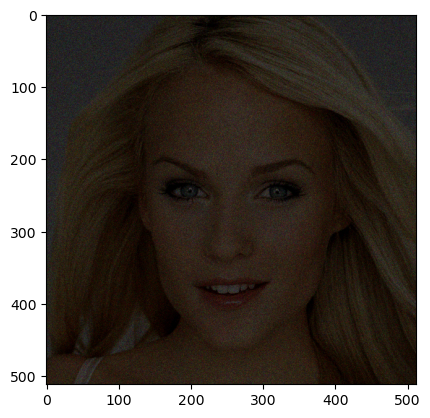

In [120]:
plt.imshow(lr_orig_np)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


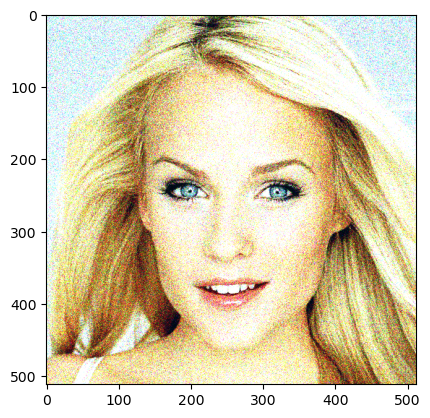

In [121]:
plt.imshow(lr_global_norm_np)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


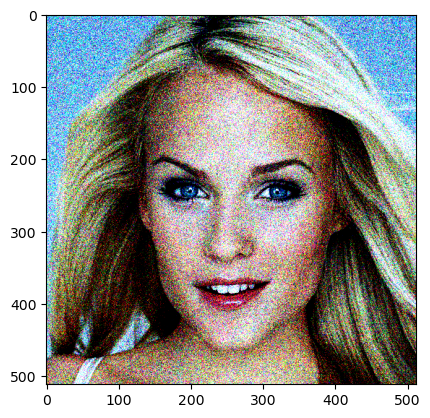

In [122]:
plt.imshow(lr_instance_norm_np)

(array([8.6200e+02, 2.8110e+03, 1.2720e+03, 1.2153e+04, 6.6570e+03,
        7.6810e+03, 8.0740e+03, 8.4110e+03, 1.0001e+04, 1.0301e+04,
        9.9040e+03, 1.2532e+04, 1.0834e+04, 6.6100e+03, 1.2839e+04,
        1.3547e+04, 1.5000e+04, 1.4181e+04, 1.4570e+04, 1.5980e+04,
        1.8214e+04, 2.0916e+04, 1.5114e+04, 2.3194e+04, 1.2045e+04,
        2.5276e+04, 1.3220e+04, 3.2484e+04, 9.9620e+03, 2.5009e+04,
        1.9248e+04, 2.0771e+04, 1.9307e+04, 2.7117e+04, 2.5438e+04,
        1.5933e+04, 1.8803e+04, 2.0508e+04, 1.4515e+04, 1.7480e+04,
        1.9455e+04, 2.3279e+04, 1.2365e+04, 9.1380e+03, 1.8163e+04,
        1.0526e+04, 1.3815e+04, 1.4300e+04, 8.0750e+03, 1.0255e+04,
        6.5670e+03, 6.0460e+03, 6.6790e+03, 4.8770e+03, 6.0150e+03,
        3.8130e+03, 4.7180e+03, 2.9100e+03, 2.7300e+03, 2.1420e+03,
        2.3270e+03, 1.9780e+03, 1.2560e+03, 1.0130e+03, 6.4500e+02,
        7.8000e+02, 7.1300e+02, 3.0700e+02, 6.2500e+02, 3.9900e+02,
        3.2800e+02, 4.2100e+02, 2.1400e+02, 1.30

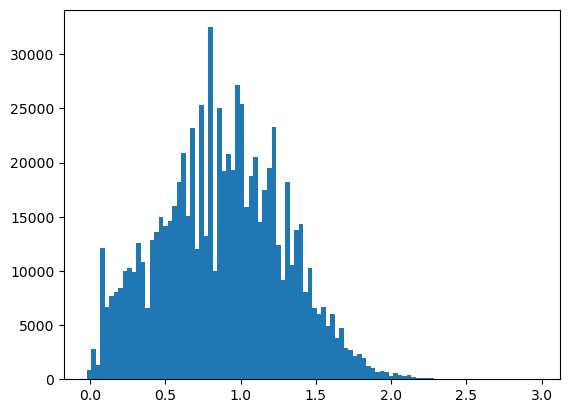

In [123]:
plt.hist(lr_global_norm_np.flatten(), bins=100)

In [124]:
lr_instance_norm_np.shape

(512, 512, 3)

(array([8.6200e+02, 2.9200e+02, 2.7000e+02, 3.3700e+02, 4.5100e+02,
        5.8000e+02, 4.9200e+02, 8.3500e+02, 3.2520e+03, 1.9020e+03,
        2.4390e+03, 4.1480e+03, 3.5480e+03, 4.4090e+03, 5.1870e+03,
        6.1610e+03, 1.7520e+04, 1.1423e+04, 1.1185e+04, 1.3136e+04,
        1.1934e+04, 1.6346e+04, 1.4915e+04, 1.3795e+04, 1.7425e+04,
        1.9225e+04, 1.6997e+04, 1.8305e+04, 1.9030e+04, 2.5709e+04,
        2.1423e+04, 2.3027e+04, 1.8981e+04, 1.8713e+04, 2.4187e+04,
        2.5587e+04, 2.1238e+04, 2.0161e+04, 2.7593e+04, 2.0212e+04,
        2.6846e+04, 2.3687e+04, 1.9174e+04, 2.0551e+04, 2.8036e+04,
        1.3462e+04, 1.6410e+04, 1.6520e+04, 1.1545e+04, 1.7978e+04,
        1.0018e+04, 9.5150e+03, 1.1608e+04, 1.0469e+04, 7.2030e+03,
        6.6130e+03, 7.9450e+03, 5.4190e+03, 4.9860e+03, 7.2340e+03,
        3.7300e+03, 4.4280e+03, 3.7030e+03, 2.4150e+03, 2.0930e+03,
        1.8810e+03, 1.5710e+03, 1.2950e+03, 1.5500e+03, 9.5200e+02,
        7.4600e+02, 6.3300e+02, 7.2800e+02, 3.98

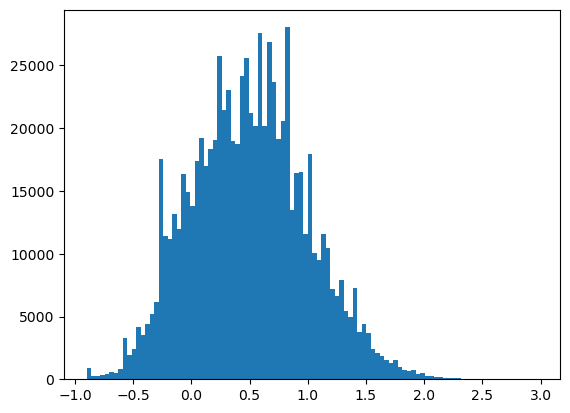

In [125]:
plt.hist(lr_instance_norm_np.flatten(), bins=100)
